In [1]:
from music21 import *

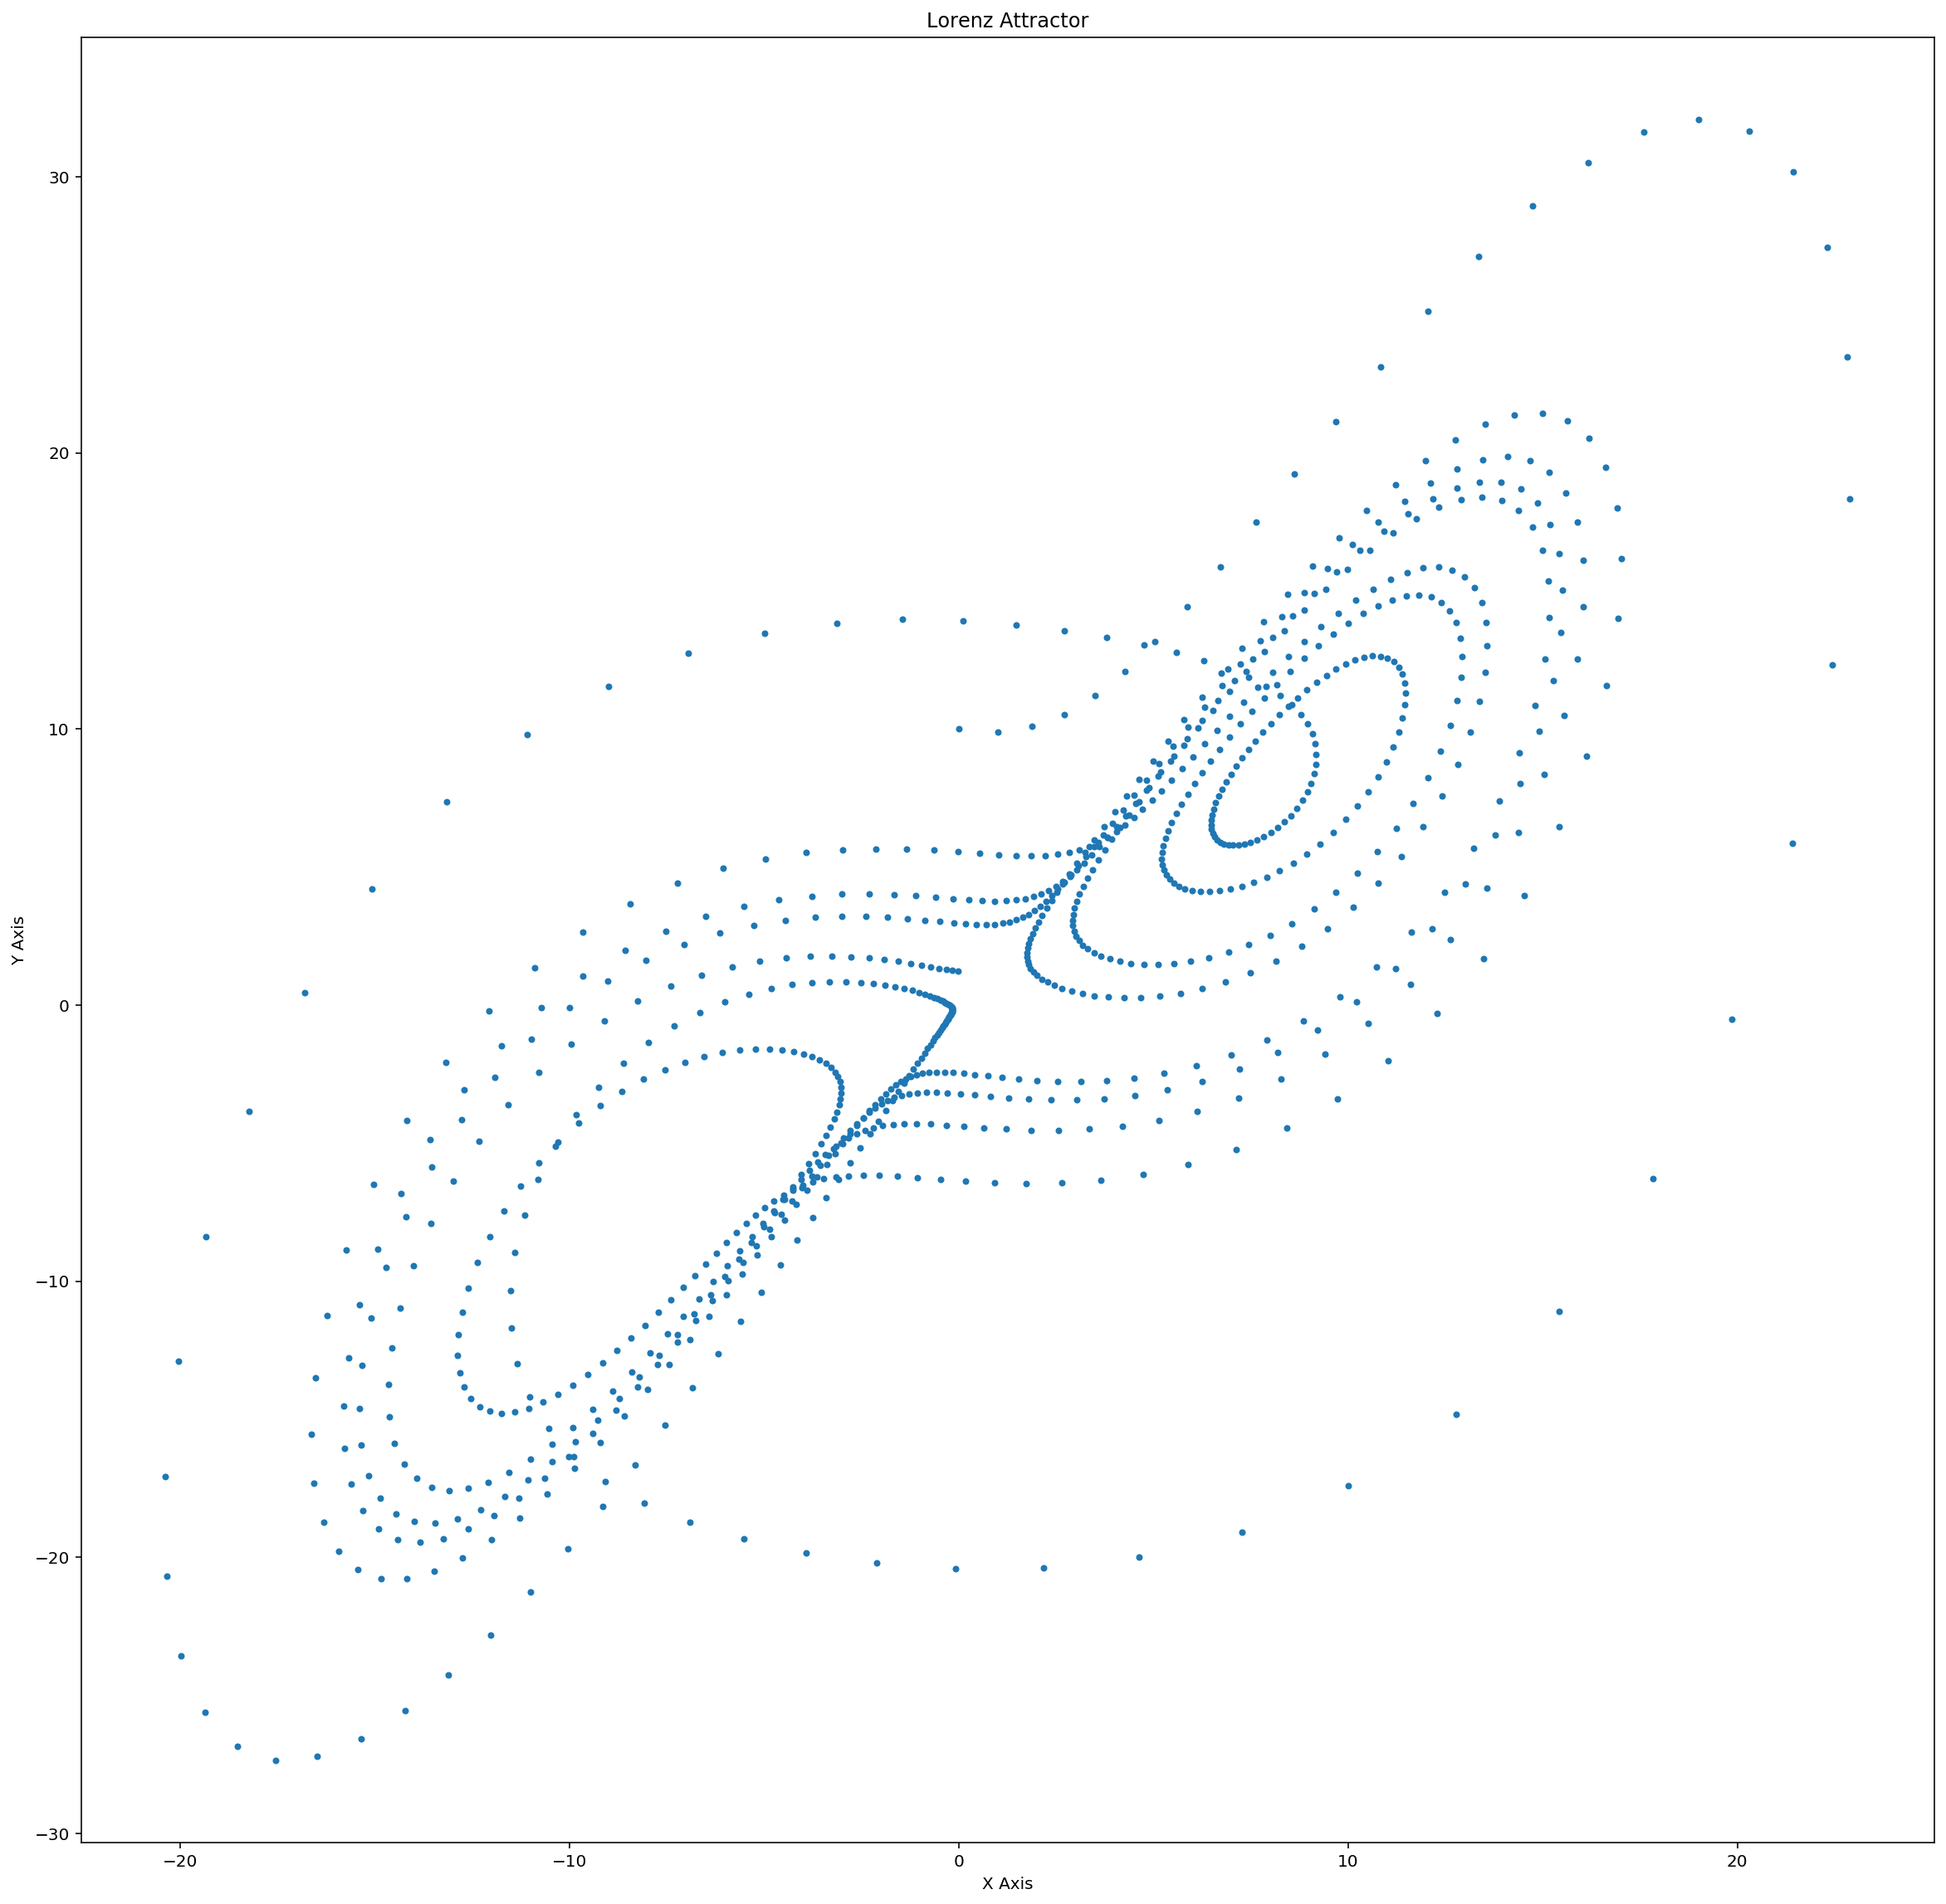

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 1000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 10, 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], r=30)
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure(figsize=(20,20))
ax = fig.gca()

ax.plot(xs, ys, '.')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_title("Lorenz Attractor")

plt.show()

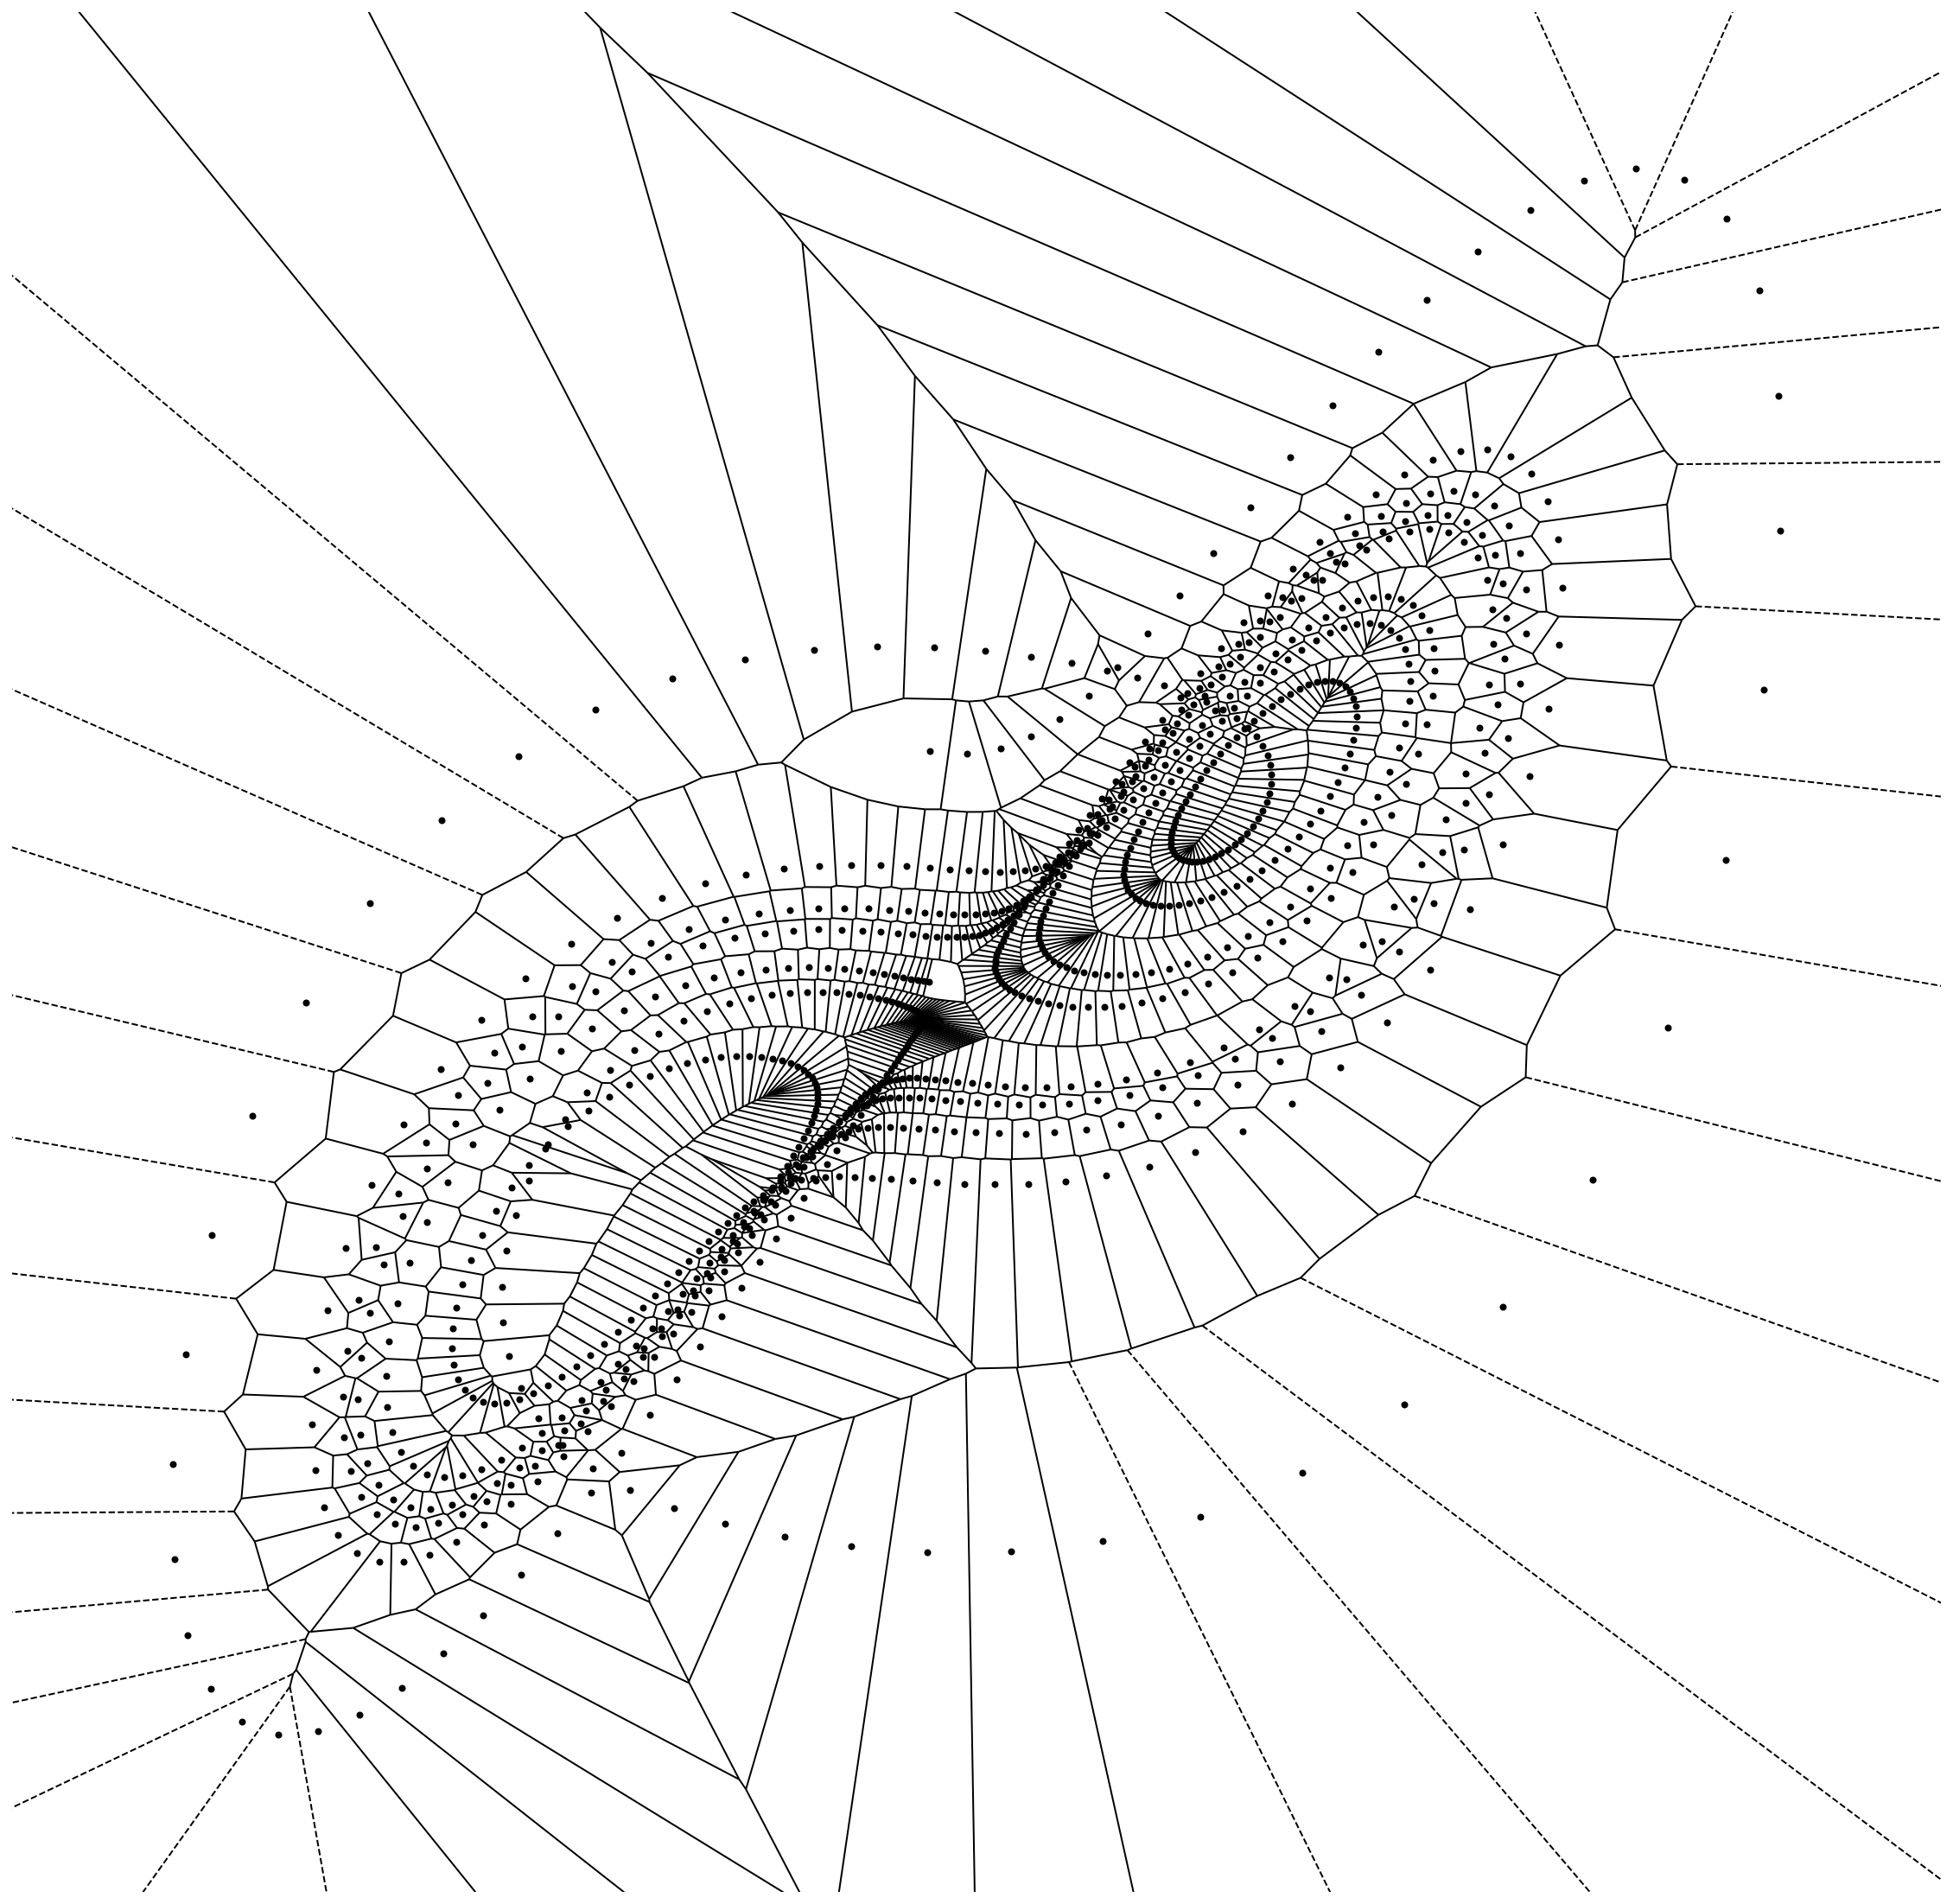

In [9]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = np.array(list(zip(xs, ys)))
vor = Voronoi(points)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
ax.plot(xs, ys, 'k.')
voronoi_plot_2d(vor, ax=ax, show_vertices=False, show_points=False)
# for i, point in enumerate(zip(xs, ys)):
#     ax.annotate(i, point)
plt.axis('off')
plt.savefig('LorenzVoronoi.png', transparent=True)
plt.show()

In [10]:
from scipy.spatial import cKDTree
tree = cKDTree(points)
dt = 0.01
num_steps = 1000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 11, 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], r=30)
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)
points2 = np.array(list(zip(xs, ys)))

_, ind = tree.query(points2)

In [14]:
list(ind)

[0,
 1,
 3,
 4,
 5,
 166,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 561,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 777,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 667,
 667,
 668,
 669,
 670,
 671,
 866,
 867,
 868,
 870,
 463,
 465,
 467,
 598,
 599,
 683,
 684,
 685,
 687,
 688,
 689,
 690,
 691,
 168,
 694,
 695,
 696,
 697,
 699,
 700,
 701,
 702,
 13,
 14,
 14,
 14,
 705,
 705,
 706,
 708,
 709,
 711,
 712,
 713,
 715,
 716,
 717,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 727,
 129,
 129,
 129,
 130,
 130,
 130,
 553,
 415,
 951,
 748,
 748,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 749,
 

In [6]:
bach = corpus.parse('bach/bwv66.6')

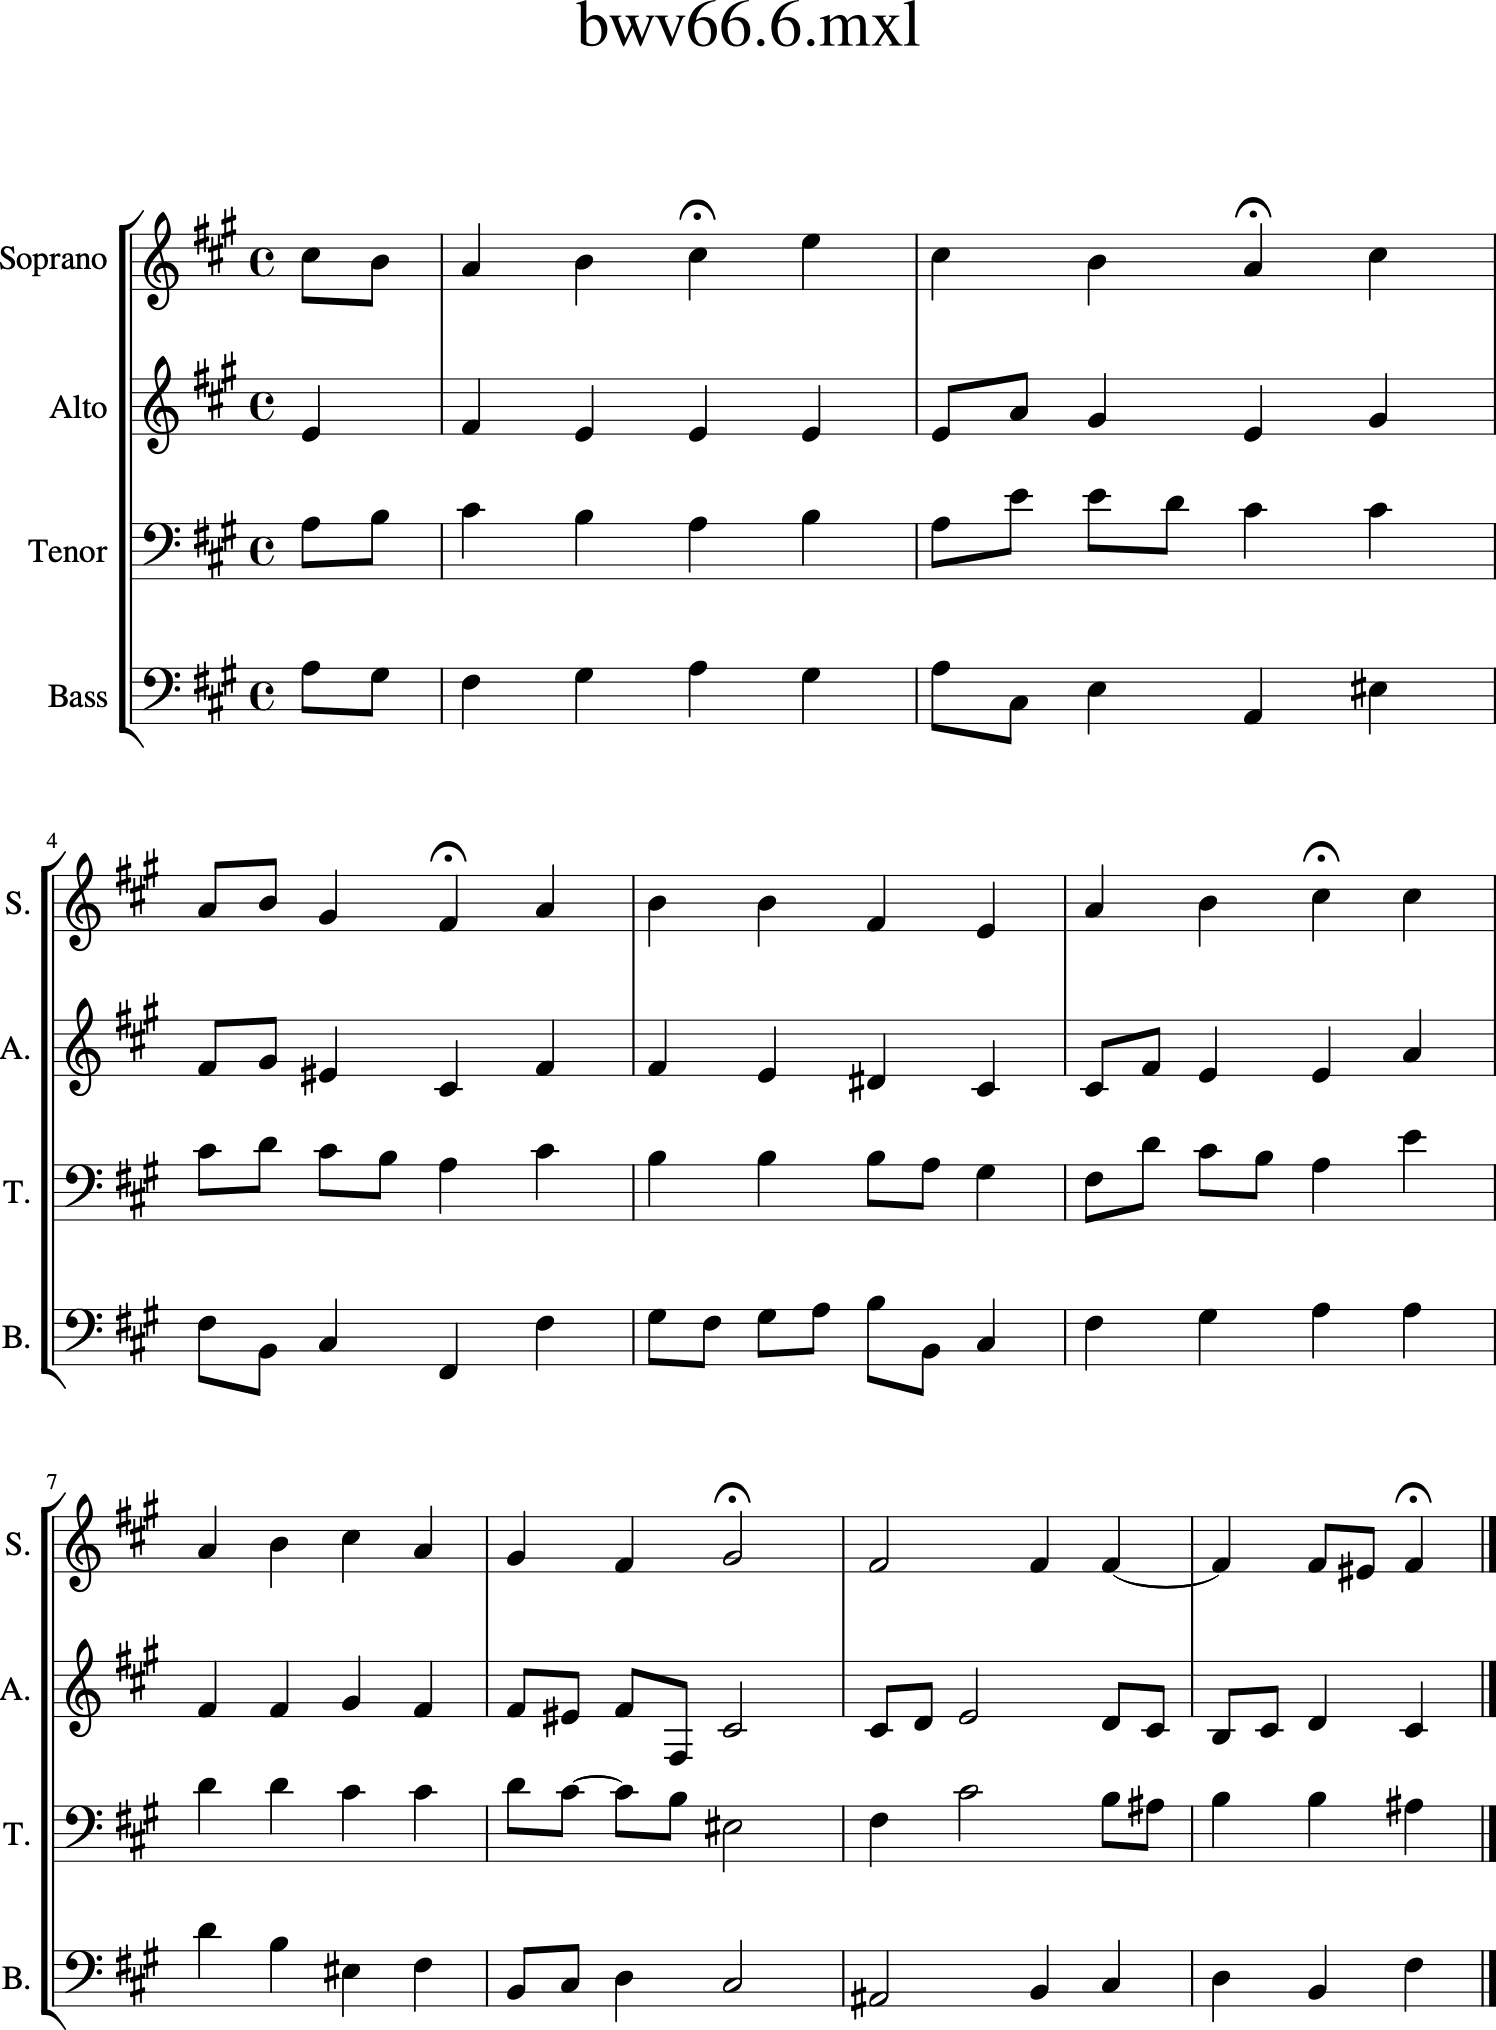

In [15]:
bach.show()

In [17]:
oldbach = bach
for i in range(len(bach.getElementsByClass(stream.measure))):
    bach.measure[i] = oldbach.measure[ind[i]]

AttributeError: module 'music21.stream' has no attribute 'measures'

In [126]:
bach.show('midi')

In [125]:
oldbach.show('midi')

In [127]:
bach.show('text')

{0.0} <music21.metadata.Metadata object at 0x124c09ac8>
{0.0} <music21.stream.Part Soprano>
    {0.0} <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of f# minor>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Note C#>
        {0.5} <music21.note.Note B>
    {1.0} <music21.stream.Measure 1 offset=1.0>
        {0.0} <music21.note.Note A>
        {1.0} <music21.note.Note B>
        {2.0} <music21.note.Note C#>
        {3.0} <music21.note.Note E>
    {5.0} <music21.stream.Measure 2 offset=5.0>
        {0.0} <music21.note.Note C#>
        {1.0} <music21.note.Note B>
        {2.0} <music21.note.Note A>
        {3.0} <music21.note.Note C#>
    {9.0} <music21.stream.Measure 3 offset=9.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.note.Note A>
        {0.5} <music21.note.Note B>
        {1.0} <music21.note.Note G